In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\nitro 5\Desktop\AI\Data Science\data\movies.csv")

In [3]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
obj_cols = df.select_dtypes(include=['object'])
obj_cols.describe()

,MOVIES,YEAR,GENRE,ONE-LINE,STARS,VOTES,Gross
count,9999,9355,9919,9999,9999,8179,460
unique,6817,438,510,8688,7877,4129,332
top,Bleach: Burîchi,(2020– ),\nComedy,\nAdd a Plot\n,\n,7,$0.01M
freq,65,892,852,1265,456,35,22


In [6]:
df.rename(columns={'Movies': "Name", "ONE-LINE": "Describe"}, inplace= True)

In [7]:
# fix the names of all columns . ex : GENRE -> Genre
cols = [col[0].upper() + col[1:].lower() for col in list(df.columns)]
df.columns = cols

In [8]:
# drop Gross column cause have missing values a lot
df["Gross"].isnull().sum()

9539

In [9]:
df.drop(columns=['Gross'], inplace=True)

In [10]:
df.isnull().sum()

Movies         0
Year         644
Genre         80
Rating      1820
Describe       0
Stars          0
Votes       1820
Runtime     2958
dtype: int64

In [11]:
# convert NaN values to string values for doing process.
df["Year"] = df["Year"].fillna("Unknown")
# fix the format of string : removing Parentheses
df["Year"] = df["Year"].str.replace(r"[()]", "", regex=True)

In [12]:
# split the "Year" column to two column
df["StartYear"] = df["Year"].str.split('–').str[0]
df['EndYear'] = df["Year"].str.split('–').str[1]

In [14]:
# identyfing pattern of these two column and back them to "Year" column.
df["EndYear"] = df["EndYear"].replace(" ", np.nan)
df['EndYear'].isnull().sum()

8611

In [15]:
df["Year"] = df["StartYear"]

In [16]:
df.drop(columns=["StartYear", "EndYear"], inplace=True)

In [17]:
#there are a lot of incorrect values 
df["Year"].unique()

,Movies,Year,Genre,Rating,Describe,Stars,Votes,Runtime
36,Titans,I 2018,"\nAction, Adventure, Crime",7.7,\nA team of young superheroes combat evil and ...,"\n \n Stars:\nBrenton Thwaites, ...","73,656",45.0
443,Climax,I 2018,"\nDrama, Horror, Music",7.0,"\nFrench dancers gather in a remote, empty sch...",\n Director:\nGaspar Noé\n| \n Stars:\nS...,"58,051",97.0
880,The Outsider,I 2018,"\nAction, Crime, Drama",6.3,\nAn epic set in post-WWII Japan and centered ...,\n Director:\nMartin Zandvliet\n| \n Sta...,"22,393",120.0
899,Anon,I 2018,"\nCrime, Sci-Fi, Thriller",6.1,"\nIn a world without anonymity or crime, a det...",\n Director:\nAndrew Niccol\n| \n Stars:...,"40,017",100.0
1047,Welcome Home,I 2018,\nThriller,5.2,\nA couple spend a weekend at a vacation renta...,\n Director:\nGeorge Ratliff\n| \n Stars...,"6,846",97.0


In [18]:
# seprate the characters from numbers and fix them
df['Year'] = df['Year'].str.replace("I 2018", "2018")

In [19]:
df["Year"] = df['Year'].str.extract('(\d+)', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nitro 5\AppData\Local\Temp\ipykernel_17324\3680823190.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["Year"] = df['Year'].str.extract('(\d+)', expand=False)


In [20]:
df["Year"].isnull().sum()

748

In [21]:
# Handling missing values in "Year" column
is_null_year = df[df["Year"].isnull() == False]
is_null_year = is_null_year["Year"].astype("int32")
is_null_year.median()
df["Year"] = df["Year"].fillna(2018)
df["Year"] = df["Year"].astype("int32")

In [22]:
df.isnull().sum()

Movies         0
Year           0
Genre         80
Rating      1820
Describe       0
Stars          0
Votes       1820
Runtime     2958
dtype: int64

In [23]:
# fixing the pattern of the "Genre" column and clean values
df["Genre"] = df["Genre"].replace("\n", "", regex=True)
df["Genre"] = df["Genre"].str.strip()

In [24]:
# fix the pattern of the "Describe" column and clean values
df["Describe"] = df["Describe"].replace("\n", "", regex=True)

In [25]:
df["Describe"]

0       A woman with a mysterious illness is forced in...
1       The war for Eternia begins again in what may b...
2       Sheriff Deputy Rick Grimes wakes up from a com...
3       An animated series that follows the exploits o...
4       A prequel, set before the events of Army of th...
                              ...                        
9994                                           Add a Plot
9995                                           Add a Plot
9996                                           Add a Plot
9997                                           Add a Plot
9998                                           Add a Plot
Name: Describe, Length: 9999, dtype: object

In [26]:
# there are custome missing values in "Describe" column 
filt = df["Describe"] == "Add a Plot"
df2 = df[filt].copy()
df2.head()

,Movies,Year,Genre,Rating,Describe,Stars,Votes,Runtime
1916,Twilight of the Gods,2018,"Animation, Action, Adventure",NaN,Add a Plot,"\n \n Stars:\nPilou Asbæk, \nJam...",NaN,NaN
2610,Past Midnight,2018,"Action, Adventure, Drama",NaN,Add a Plot,\n Director:\nRick Famuyiwa\n| \n Star:\...,NaN,NaN
2710,Thomas & Friends: All Engines Go!,2021,"Animation, Adventure, Comedy",NaN,Add a Plot,"\n \n Stars:\nJohnathan Michael,...",NaN,30.0
2775,The Princess Switch 3,2021,"Comedy, Drama, Family",NaN,Add a Plot,\n Director:\nMike Rohl\n| \n Stars:\nVa...,NaN,NaN
3144,Our Man from Jersey,2018,NaN,NaN,Add a Plot,"\n \n Stars:\nMark Wahlberg, \nH...",NaN,NaN


In [27]:
df2.isnull().sum()

Movies         0
Year           0
Genre         31
Rating       888
Describe       0
Stars          0
Votes        888
Runtime     1053
dtype: int64

In [28]:
# fix and drop missing values from test DataFrame
df2.dropna(axis="index", subset=["Genre"], inplace=True)
df2.dropna(how="all", axis="index", subset=["Rating", "Votes", "Runtime"], inplace=True)

In [29]:
# convert custome missing values to NaN 
df["Describe"] = df["Describe"].replace("Add a Plot", np.nan)
df["Describe"].isnull().sum()

1265

In [30]:
# Handling missing values
df.dropna(how="all", axis="index", subset=["Describe", "Genre"], inplace=True)
df.dropna(how="all", axis="index", subset=["Describe", "Rating", "Runtime"], inplace=True)

In [31]:
df.isnull().sum()

Movies         0
Year           0
Genre         49
Rating      1002
Describe     441
Stars          0
Votes       1002
Runtime     2137
dtype: int64

In [32]:
# 
df["Runtime"].describe()

count    7038.000000
mean       68.684712
std        47.262075
min         1.000000
25%        36.000000
50%        60.000000
75%        95.000000
max       853.000000
Name: Runtime, dtype: float64

<Axes: >

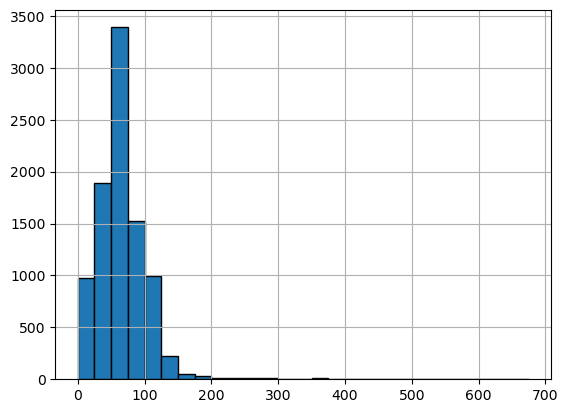

In [96]:
bins = [i for i in range(0,700, 25)]
df["Runtime"].hist(bins=bins, edgecolor='black')

In [86]:
# Outlier detection
df["Runtime"] = df["Runtime"].fillna(68)
Q1 = np.percentile(df["Runtime"], 25)
Q3 = np.percentile(df["Runtime"], 75)
print(Q1,Q3)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

44.0 89.0


In [84]:
print(lower_bound, upper_bound, IQR)

-23.5 156.5 45.0


count    9031.000000
mean       65.320120
std        29.532525
min         1.000000
25%        43.000000
50%        68.000000
75%        87.000000
max       156.000000
Name: Runtime, dtype: float64

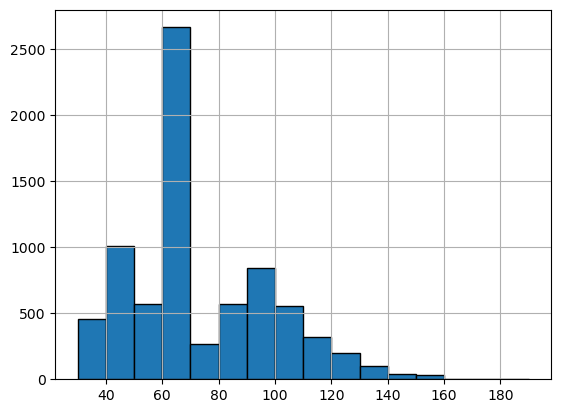

In [94]:
df_no_outliers = df[(df['Runtime'] >= lower_bound) & (df['Runtime'] <= upper_bound)]
bins = [i for i in range(30, 200,10)]
df_no_outliers["Runtime"].hist(bins=bins, edgecolor='black')
df_no_outliers["Runtime"].describe()

In [90]:
df["Runtime"].describe()

count    9175.000000
mean       68.525232
std        41.394040
min         1.000000
25%        44.000000
50%        68.000000
75%        89.000000
max       853.000000
Name: Runtime, dtype: float64

In [104]:
df["Runtime"] = df_no_outliers["Runtime"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9175 entries, 0 to 9979
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movies    9175 non-null   object 
 1   Year      9175 non-null   int32  
 2   Genre     9126 non-null   object 
 3   Rating    8173 non-null   float64
 4   Describe  8734 non-null   object 
 5   Stars     9175 non-null   object 
 6   Votes     8173 non-null   object 
 7   Runtime   9031 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 609.3+ KB
